<a href="https://colab.research.google.com/github/WIDS-Datathon-ScienceSparkerz/Priya/blob/main/WIDS_Datathon_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as snb
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
df_train = pd.read_csv('/content/gdrive/My Drive/widsdatathon2021/TrainingWiDS2021.csv')
df_test = pd.read_csv('/content/gdrive/My Drive/widsdatathon2021/UnlabeledWiDS2021.csv')
df_dataDictionary = pd.read_csv('/content/gdrive/My Drive/widsdatathon2021/DataDictionaryWiDS2021.csv')
df_Samplesubmission = pd.read_csv('/content/gdrive/My Drive/widsdatathon2021/SampleSubmissionWiDS2021.csv')
print('Training_Data',df_train.shape)
print('Test_Data',df_test.shape)

Training_Data (130157, 181)
Test_Data (10234, 180)


In [ ]:
df_train.head()

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,...,11.3,11.3,36.9,36.9,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.39,4.0,...,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,0,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
# We can remove for sure =>  Unnamed: 0,encounter_id,hospital_id,Height , Weight , icu_id 
# We can remove in dilemma (need analysis) =>  ethnicity,hospital_admit_source ,icu_admit_source , icu_stay_type

In [ ]:
 #Getting all category columns
 Alpha_cat_columns= df_train.select_dtypes(include=['object'])
 Alpha_cat_columns_test = df_test.select_dtypes(include=['object'])
 print(Alpha_cat_columns.columns)
 print(Alpha_cat_columns_test.columns)

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type'],
      dtype='object')
Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type'],
      dtype='object')


In [ ]:
for category in Alpha_cat_columns:
  print('\n category:' , category)
  print(df_train[category].value_counts())


 category: ethnicity
Caucasian           100236
African American     13911
Other/Unknown         6261
Hispanic              5049
Asian                 2198
Native American        915
Name: ethnicity, dtype: int64

 category: gender
M    70518
F    59573
Name: gender, dtype: int64

 category: hospital_admit_source
Emergency Department    51258
Operating Room          13757
Floor                   11324
Direct Admit             8253
Recovery Room            4563
Other Hospital           2417
Acute Care/Floor         2097
Step-Down Unit (SDU)     1607
PACU                     1031
Other ICU                 283
Chest Pain Center         253
ICU to SDU                 62
ICU                        37
Observation                10
Other                       7
Name: hospital_admit_source, dtype: int64

 category: icu_admit_source
Accident & Emergency         76846
Operating Room / Recovery    27436
Floor                        21459
Other Hospital                3464
Other ICU              

In [ ]:
for category in Alpha_cat_columns:
  print('\n category:' , category)
  print(df_train[df_train['diabetes_mellitus'] == 1][category].value_counts())


 category: ethnicity
Caucasian           20605
African American     3654
Other/Unknown        1595
Hispanic             1243
Asian                 538
Native American       294
Name: ethnicity, dtype: int64

 category: gender
M    15420
F    12726
Name: gender, dtype: int64

 category: hospital_admit_source
Emergency Department    10959
Operating Room           2943
Floor                    2478
Direct Admit             1819
Recovery Room             828
Acute Care/Floor          518
Other Hospital            453
Step-Down Unit (SDU)      395
PACU                      212
Other ICU                  43
Chest Pain Center          40
ICU to SDU                 15
ICU                         4
Observation                 2
Name: hospital_admit_source, dtype: int64

 category: icu_admit_source
Accident & Emergency         16681
Operating Room / Recovery     5624
Floor                         5041
Other Hospital                 637
Other ICU                      135
Name: icu_admit_source, 

In [ ]:
df_train[(df_train['diabetes_mellitus'] == 1) & (df_train['ethnicity'] == 'Caucasian')]['ethnicity'].count()

20605

In [ ]:
for val in df_train['ethnicity'].unique():
  print(val)

Caucasian
nan
Hispanic
African American
Asian
Native American
Other/Unknown


In [ ]:
def affected_percentage(df,column_name,value):
  diabet_positive_count = df[(df['diabetes_mellitus'] == 1) & (df[column_name] == value)][column_name].count()
  category_totalCount = df[df[column_name] == value][column_name].count()
  percet = diabet_positive_count/category_totalCount* 100
  print('affected_percentage for', column_name ,':',value,'is',percet)
for category in Alpha_cat_columns:
  unique_list = df_train[category].unique()
  for val in unique_list:
      affected_percentage(df_train,category,val)

affected_percentage for ethnicity : Caucasian is 20.556486691408278
affected_percentage for ethnicity : nan is nan
affected_percentage for ethnicity : Hispanic is 24.618736383442265
affected_percentage for ethnicity : African American is 26.266982963122707
affected_percentage for ethnicity : Asian is 24.476797088262057
affected_percentage for ethnicity : Native American is 32.131147540983605
affected_percentage for ethnicity : Other/Unknown is 25.475163711867115


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


affected_percentage for gender : M is 21.866757423636518
affected_percentage for gender : F is 21.362026421365385
affected_percentage for gender : nan is nan
affected_percentage for hospital_admit_source : Floor is 21.882726951607207
affected_percentage for hospital_admit_source : Emergency Department is 21.380077256233175
affected_percentage for hospital_admit_source : Operating Room is 21.392745511376027
affected_percentage for hospital_admit_source : nan is nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


affected_percentage for hospital_admit_source : Direct Admit is 22.040470132073185
affected_percentage for hospital_admit_source : Other Hospital is 18.742242449317338
affected_percentage for hospital_admit_source : Other ICU is 15.19434628975265
affected_percentage for hospital_admit_source : ICU to SDU is 24.193548387096776
affected_percentage for hospital_admit_source : Recovery Room is 18.14595660749507
affected_percentage for hospital_admit_source : Chest Pain Center is 15.810276679841898
affected_percentage for hospital_admit_source : Step-Down Unit (SDU) is 24.579962663347853
affected_percentage for hospital_admit_source : Acute Care/Floor is 24.70195517405818
affected_percentage for hospital_admit_source : PACU is 20.56256062075655
affected_percentage for hospital_admit_source : Observation is 20.0
affected_percentage for hospital_admit_source : ICU is 10.81081081081081
affected_percentage for hospital_admit_source : Other is 0.0
affected_percentage for icu_admit_source : Floor

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.


affected_percentage for icu_stay_type : admit is 21.63282320969048
affected_percentage for icu_stay_type : readmit is 28.13008130081301
affected_percentage for icu_stay_type : transfer is 20.683191001874608
affected_percentage for icu_type : CTICU is 23.899932990842082
affected_percentage for icu_type : Med-Surg ICU is 21.71321430570325
affected_percentage for icu_type : CCU-CTICU is 22.84313725490196
affected_percentage for icu_type : Neuro ICU is 15.921389917402449
affected_percentage for icu_type : MICU is 23.848684210526315
affected_percentage for icu_type : SICU is 18.418503269556794
affected_percentage for icu_type : Cardiac ICU is 21.846302561623972
affected_percentage for icu_type : CSICU is 27.785585223850635


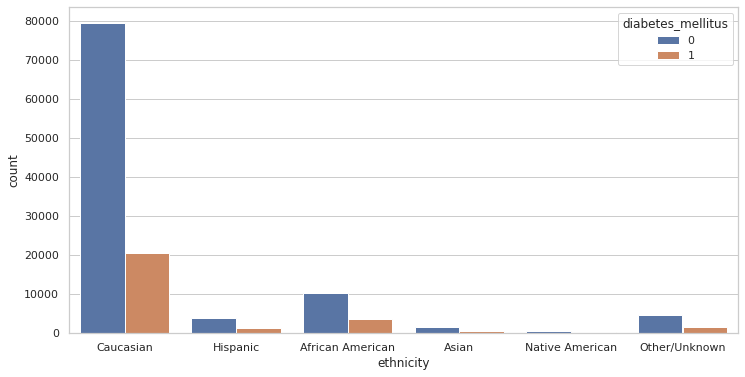

In [ ]:
 import seaborn as sns
import matplotlib.pyplot  as plt
plt.figure(figsize=(12, 6))
sns.countplot(x="ethnicity", hue="diabetes_mellitus", data=df_train)

In [ ]:
def GetNullCount_Category(df):
  print(df[Alpha_cat_columns.columns].isnull().sum(),'\n')

GetNullCount_Category(df_train)
GetNullCount_Category(df_test)

ethnicity                 1587
gender                      66
hospital_admit_source    33198
icu_admit_source           240
icu_stay_type                0
icu_type                     0
dtype: int64 

ethnicity                 204
gender                      5
hospital_admit_source    2733
icu_admit_source           25
icu_stay_type               0
icu_type                    0
dtype: int64 



In [ ]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()
for category in Alpha_cat_columns:
  df_train[category] = imputer.fit_transform(df_train[category])
  df_test[category] = imputer.fit_transform(df_test[category])
GetNullCount_Category(df_train)
GetNullCount_Category(df_test)

ethnicity                0
gender                   0
hospital_admit_source    0
icu_admit_source         0
icu_stay_type            0
icu_type                 0
dtype: int64 

ethnicity                0
gender                   0
hospital_admit_source    0
icu_admit_source         0
icu_stay_type            0
icu_type                 0
dtype: int64 



In [ ]:
#get numeric categoty columns
Total_num_columns = df_train.select_dtypes(include=['float','int']).iloc[:,3:].drop(columns=['icu_id'])
Total_num_columns
print("Binary values")
for col in Total_num_columns[1:1]:
       if(len(df_train[col].unique()) <3):
         print(col,":",len(df_train[col].unique()))
print("\n More than Binary values")
for col in Total_num_columns[1:1]:
        if(len(df_train[col].unique()) < 10 and len(df_train[col].unique()) > 3):
           print(col,":",len(df_train[col].unique()))

Binary values
elective_surgery : 2
readmission_status : 1
apache_post_operative : 2
arf_apache : 2
intubated_apache : 2
ventilated_apache : 2
aids : 2
cirrhosis : 2
hepatic_failure : 2
immunosuppression : 2
leukemia : 2
lymphoma : 2
solid_tumor_with_metastasis : 2
diabetes_mellitus : 2

 More than Binary values
gcs_eyes_apache : 5
gcs_motor_apache : 7
gcs_verbal_apache : 6


In [ ]:
print('Unique values of readmission status on training dataset is: ',df_train['readmission_status'].unique())
print('Unique values of readmission status on test dataset is: ',df_test['readmission_status'].unique())

# We can drop the column readmission status , as it is having only zero as value

Unique values of readmission status on training dataset is:  [0]
Unique values of readmission status on test dataset is:  [0]


In [ ]:
df_train.drop(columns='readmission_status',inplace=True)
df_test.drop(columns='readmission_status',inplace=True)

In [ ]:
df_train['ethnicity'].unique()

array(['Caucasian', 'Hispanic', 'African American', 'Asian',
       'Native American', 'Other/Unknown'], dtype=object)

In [ ]:
df_train.describe() #Summary of statistical columns_

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,...,27367.000000,27367.000000,27201.000000,27201.000000,48944.000000,48944.000000,11690.000000,11690.000000,24428.000000,24428.000000,29336.000000,29336.000000,28376.000000,28376.000000,24171.000000,24171.000000,45696.000000,45696.000000,45350.000000,45350.000000,46147.000000,46147.000000,36818.000000,36818.000000,22491.000000,22491.000000,22308.000000,22308.000000,22712.000000,22712.000000,16760.000000,16760.000000,130157.00000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000,130157.000000
mean,65079.000000,213000.856519,106.102131,61.995103,29.110260,0.189840,169.607219,662.428344,0.839933,83.791104,2.886149,185.492683,565.994296,0.207111,0.027997,1.201222,25.718070,1.481629,0.595735,3.488290,5.484828,0.011441,4.030203,160.141416,99.854530,32.975817,0.156626,87.193046,42.161246,42.161246,132.061737,7.352154,25.150603,137.94526,36.420638,1800.803417,0.330432,12.187662,79.261563,46.969706,...,11.204166,11.088205,33.731830,33.349796,1.577788,1.463473,3.028198,2.976982,193.943057,193.123506,4.188984,4.147028,138.167205,137.879814,13.387873,13.336485,45.341451,38.535587,7.387687,7.322903,165.003814,102.957476,287.600071,224.005403,44.552966,43.341081,7.337283,7.327771,163.035835,145.949537,247.525419,239.617358,0.00103,0.016081,0.013599,0.025669,0.007307,0.004187,0.020852,0.216285
std,37573.233831,38109.828146,63.482277,16.822880,8.262776,0.392176,10.833085,304.259843,2.485337,24.963063,0.689812,85.858208,466.510850,0.405238,0.164965,2.351994,20.690041,1.543535,0.262922,0.939831,1.271039,0.106349,1.538528,90.701327,30.759505,6.834576,0.363449,41.908109,12.267414,12.267414,84.958826,0.098423,15.024730,5.30384,0.857584,1456.551481,0.470370,6.931023,21.693320,12.736433,...,2.350633,2.381224,6.804903,6.963975,0.946477,0.737639,2.898524,2.854953,92.486473,92.692759,0.760183,0.749463,5.711628,5.658036,6.933161,6.915142,14.623775,10.996254,0.085651,0.111530,107.084058,61.514357,130.319620,119.119675,14.631359,14.052015,0.105930,0.108658,112.646743,100.211935,131.440167,128.562211,0.03207,0.125786,0.115819,0.158146,0.085166,0.064574,0.142888,0.411712
min,1.000000,147000.000000,1.000000,0.000000,14.844926,0.000000,137

In [ ]:
df_train["diabetes_mellitus"].value_counts()

#  data is inbalanced. we need to dmake the data balanced.

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

In [ ]:
def missing_value_in_percent(df):
  percent_missing = df_train.isnull().sum() * 100 / len(df_train)
  missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
  return missing_value_df
missing_value_in_percent(df_train)

,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
encounter_id,encounter_id,0.000000
hospital_id,hospital_id,0.000000
age,age,3.832295
bmi,bmi,3.449680
...,...,...
immunosuppression,immunosuppression,0.000000
leukemia,leukemia,0.000000
lymphoma,lymphoma,0.000000
solid_tumor_with_metastasis,solid_tumor_with_metastasis,0.000000


In [ ]:
df_train['hospital_admit_source'].unique()

array(['Floor', 'Emergency Department', 'Operating Room', 'Direct Admit',
       'Other Hospital', 'Other ICU', 'ICU to SDU', 'Recovery Room',
       'Chest Pain Center', 'Step-Down Unit (SDU)', 'Acute Care/Floor',
       'PACU', 'Observation', 'ICU', 'Other'], dtype=object)

In [ ]:
df_train['icu_admit_source'].unique()

array(['Floor', 'Accident & Emergency', 'Operating Room / Recovery',
       'Other Hospital', 'Other ICU'], dtype=object)

In [ ]:
df_train

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.450,33.0,145.0,...,11.3,11.3,36.9,36.9,1.30,1.30,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.450,7.450,51.0,51.0,54.8,51.000000,37.0,37.0,7.450,7.450,51.0,51.0,51.0,51.0,0,0,0,0,0,0,0,1
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,NaN,122.0,703.03,0,0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,NaN,203.0,1206.03,1,0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.390,4.0,NaN,...,11.6,11.6,34.0,34.0,1.60,1.10,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.440,7.340,337.0,102.0,342.5,236.666667,36.0,33.0,7.370,7.340,337.0,265.0,337.0,337.0,0,0,0,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,Emergency Department,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,NaN,119.0,601.01,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,130153,164758,7,50.0,29.287256,0,Caucasian,M,175.3,Emergency Department,Accident & Emergency,1109,admit,Cardiac ICU,0.023611,90.0,NaN,110.0,104.01,0,0,NaN,NaN,NaN,NaN,4.0,6.0,0.0,5.0,NaN,106.0,NaN,0,120.0,NaN,NaN,NaN,NaN,50.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0
130153,130154,197653,7,79.0,29.653433,0,Caucasian,F,162.6,Direct Admit,Accident & Emergency,1106,admit,MICU,0.009722,78.4,3.5,105.0,207.01,0,0,0.7,

In [ ]:
Alpha_cat_columns.columns

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type'],
      dtype='object')

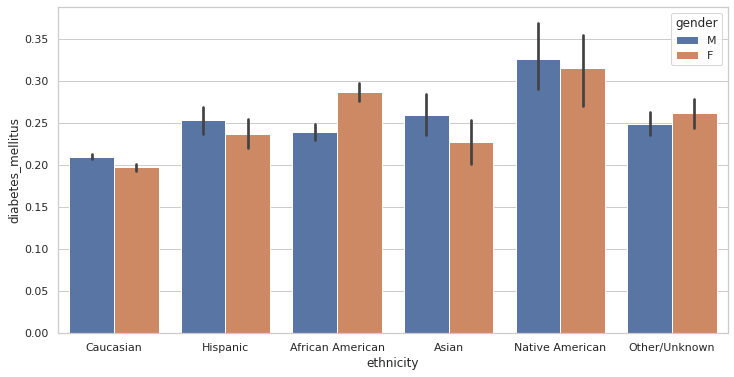

In [ ]:
import seaborn as sns
import matplotlib.pyplot  as plt
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(df)
ax = sns.barplot(x="ethnicity", y="diabetes_mellitus",hue='gender' ,data=df_train)


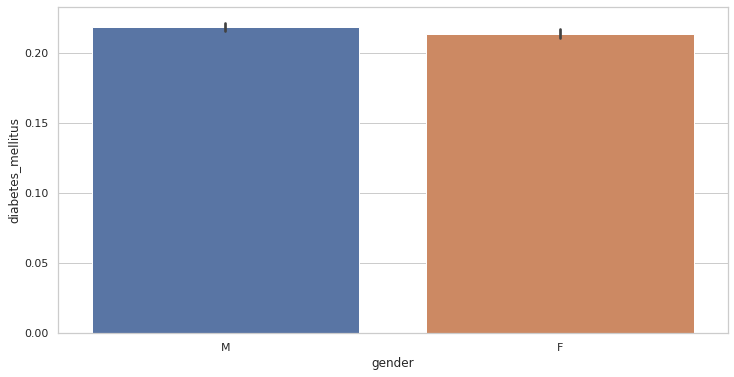

In [ ]:
import seaborn as sns
import matplotlib.pyplot  as plt
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(df)
ax = sns.barplot(x="gender", y="diabetes_mellitus" ,data=df_train)

#. Male , Female equally having the disease

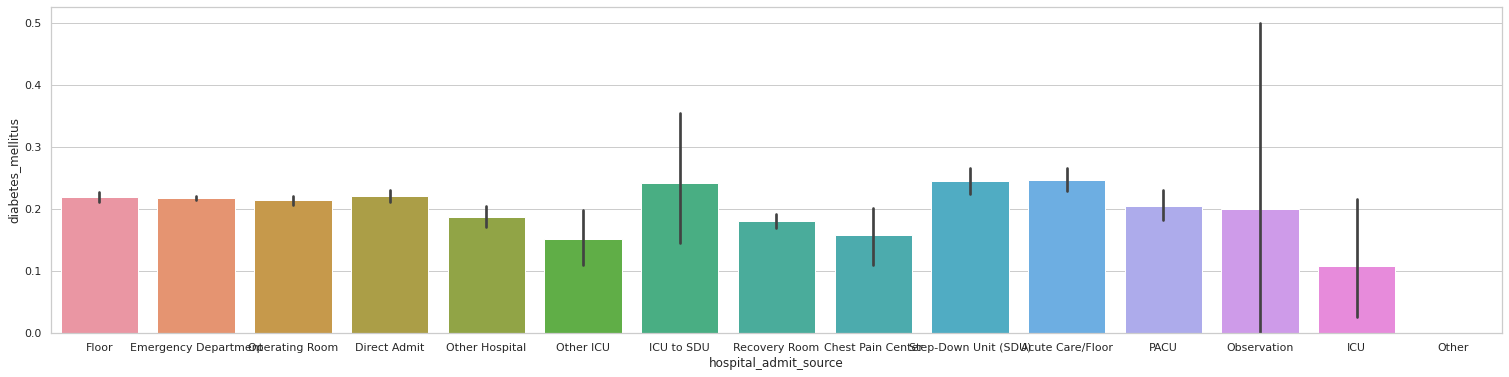

In [ ]:

import seaborn as sns
import matplotlib.pyplot  as plt
plt.figure(figsize=(26, 6))
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(df)
ax = sns.barplot(x="hospital_admit_source", y="diabetes_mellitus" ,data=df_train)

#. Male , Female equally having the disease

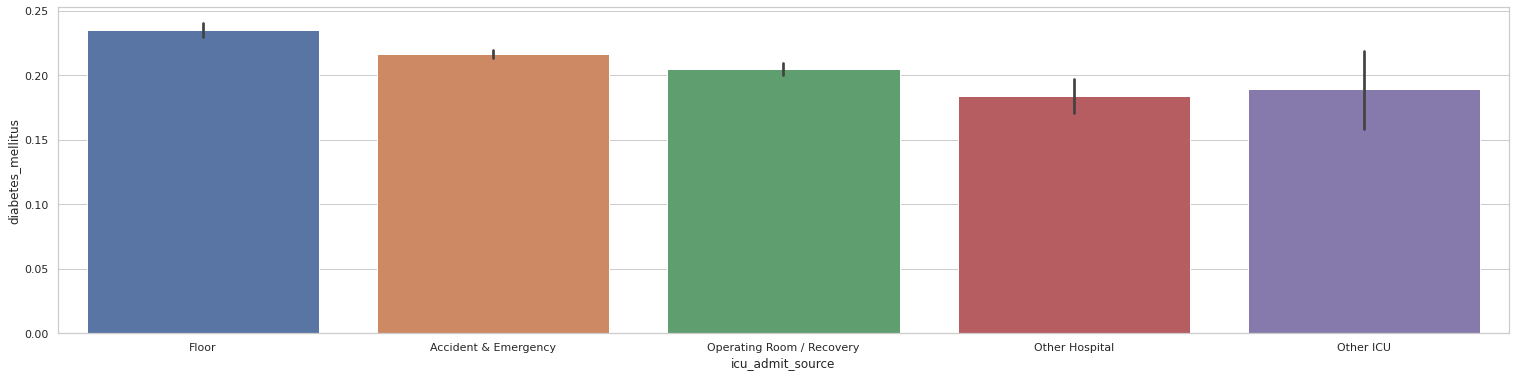

In [ ]:
import seaborn as sns
import matplotlib.pyplot  as plt
plt.figure(figsize=(26, 6))
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(df)
ax = sns.barplot(x="icu_admit_source", y="diabetes_mellitus" ,data=df_train)


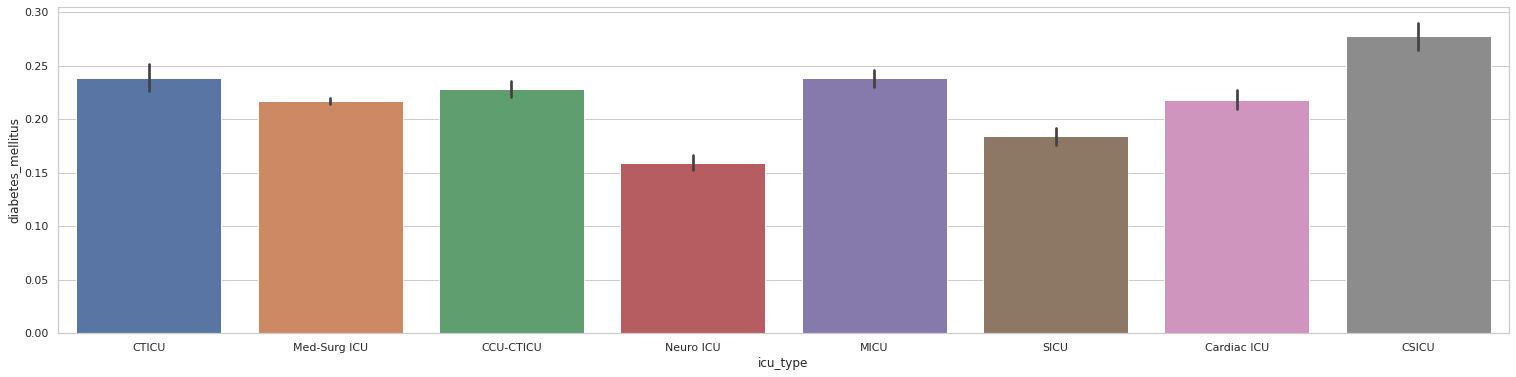

In [ ]:
import seaborn as sns
import matplotlib.pyplot  as plt
plt.figure(figsize=(26, 6))
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(df)
ax = sns.barplot(x="icu_type", y="diabetes_mellitus" ,data=df_train)


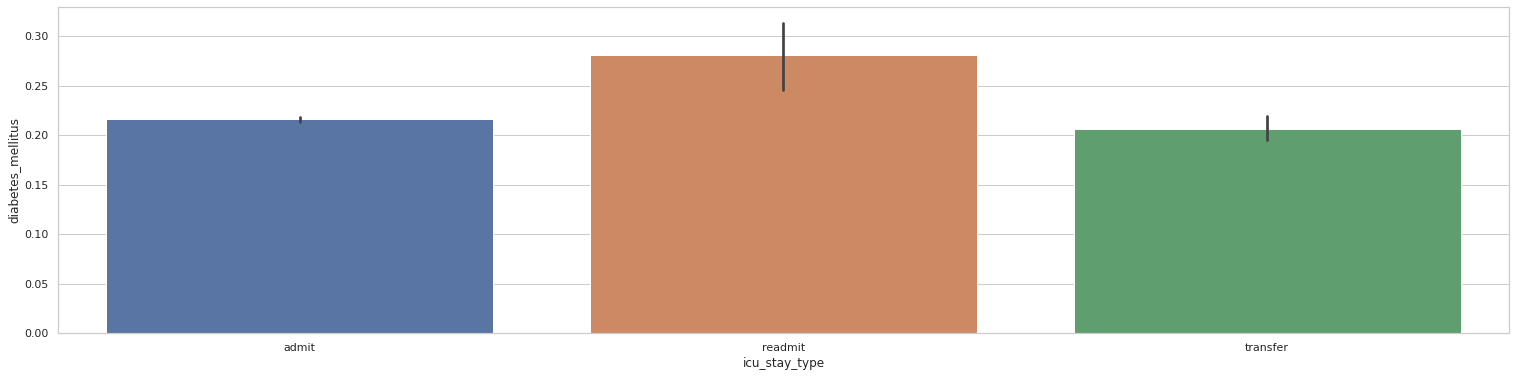

In [ ]:
import seaborn as sns
import matplotlib.pyplot  as plt
plt.figure(figsize=(26, 6))
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset(df)
ax = sns.barplot(x="icu_stay_type", y="diabetes_mellitus" ,data=df_train)

In [ ]:
df_train['icu_stay_type'].unique()

array(['admit', 'readmit', 'transfer'], dtype=object)

In [ ]:
Alpha_cat_columns

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type
0,Caucasian,M,Floor,Floor,admit,CTICU
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU
3,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU
4,Caucasian,M,NaN,Accident & Emergency,admit,Med-Surg ICU
...,...,...,...,...,...,...
130152,Caucasian,M,Emergency Department,Accident & Emergency,admit,Cardiac ICU
130153,Caucasian,F,Direct Admit,Accident & Emergency,admit,MICU
130154,African American,M,Emergency Department,Accident & Emergency,admit,Cardiac ICU
130155,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU


In [ ]:
demographic_features = ['age', 
                        'bmi', 
                        'elective_surgery',
                        'ethnicity', 
                        'gender', 
                        'height', 
                        'hospital_admit_source', 
                        'icu_admit_source', 
                        'icu_stay_type', 
                        'icu_id', 
                        'icu_stay_type', 
                        'icu_type', 
                        'pre_icu_los_days', 
                        'readmission_status',
                        'weight']

In [ ]:
df_temp = df_train.drop(columns=['Unnamed: 0',	'encounter_id',	'hospital_id','hospital_admit_source','icu_admit_source','icu_id','icu_stay_type','icu_type'])
df_temp[df_temp.duplicated()].index
df_train.drop(axis='index',index=df_temp[df_temp.duplicated()].index,inplace=True)

# dropped all duplicate rows

(array([ 1132.,  5828.,  7458., 11937., 23212., 28727., 27363., 19482.,
            0.,     0.]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110]),
 <a list of 10 Patch objects>)

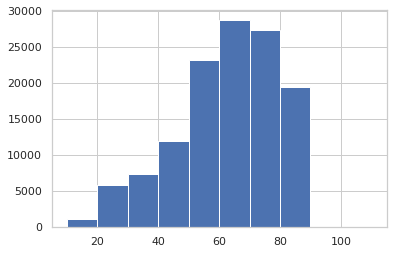

In [ ]:
# Checking age distribution on the training set
plt.hist(df_train.age, bins=[10,20,30,40,50,60,70,80,90,100,110])

(array([31887., 37154., 23392., 11537.,  5581.,  2600.,  1311.,   710.,
          403.,   792.]),
 array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]),
 <a list of 10 Patch objects>)

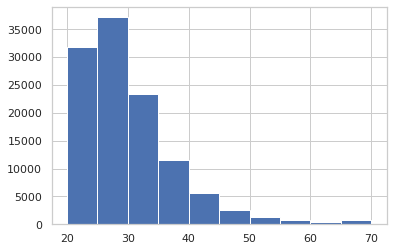

In [ ]:
plt.hist(df_train.bmi, bins=[20,25,30,35,40,45,50,55,60,65,70])

In [ ]:
df_train[df_train['age']<=0][['age','height','weight','bmi','diabetes_mellitus','ethnicity']]
#There are only 20 rows.So its fine to drop these rows

,age,height,weight,bmi,diabetes_mellitus,ethnicity
10394,0.0,NaN,NaN,NaN,0,Caucasian
10953,0.0,165.1,NaN,NaN,0,Caucasian
12376,0.0,NaN,NaN,NaN,0,Caucasian
12538,0.0,170.1,100.0,34.561404,0,Caucasian
13298,0.0,157.5,64.9,26.162761,0,African American
14122,0.0,193.0,79.5,21.342855,1,Caucasian
25765,0.0,NaN,70.0,NaN,0,Caucasian
34590,0.0,162.5,44.1,16.700592,0,Caucasian
35300,0.0,182.9,142.7,42.657614,0,Caucasian
35429,0.0,177.8,107.7,34.068435,0,Caucasian


In [ ]:
def miss_val_percent(df, thresh = 70.0):
    """
    Remove all features that have a missing value percentage greater than 80%
    """
    mvp = ((df.isnull().sum()) / (len(df))) * 100
    return mvp[mvp > thresh]

In [ ]:
retained_features = set(df_train.columns) - set(miss_val_percent(df_train).index)
print(retained_features)
# subset train and test sets
df_train_refined = df_train[retained_features].drop(columns='diabetes_mellitus')
df_test_refined = df_test[df_train_refined.columns]
print('Train:' , df_train_refined.shape)
print('Test:',df_test_refined.shape)

{'bun_apache', 'd1_heartrate_min', 'h1_temp_max', 'height', 'd1_arterial_po2_min', 'gcs_unable_apache', 'd1_mbp_max', 'd1_spo2_max', 'elective_surgery', 'd1_albumin_max', 'weight', 'ventilated_apache', 'solid_tumor_with_metastasis', 'd1_bilirubin_min', 'intubated_apache', 'icu_id', 'leukemia', 'd1_inr_max', 'd1_heartrate_max', 'aids', 'icu_admit_source', 'h1_mbp_noninvasive_min', 'd1_diasbp_noninvasive_max', 'd1_arterial_ph_min', 'creatinine_apache', 'wbc_apache', 'd1_calcium_max', 'd1_glucose_min', 'd1_sysbp_noninvasive_max', 'h1_spo2_min', 'apache_3j_diagnosis', 'albumin_apache', 'immunosuppression', 'lymphoma', 'sodium_apache', 'd1_sysbp_noninvasive_min', 'd1_resprate_min', 'h1_diasbp_noninvasive_min', 'h1_resprate_max', 'h1_mbp_max', 'gcs_motor_apache', 'd1_hemaglobin_max', 'd1_sysbp_min', 'd1_temp_min', 'd1_temp_max', 'd1_hematocrit_max', 'h1_glucose_max', 'h1_resprate_min', 'resprate_apache', 'd1_arterial_po2_max', 'h1_mbp_noninvasive_max', 'ethnicity', 'pre_icu_los_days', 'hospi

In [ ]:
df_missing = missing_value_in_percent(df_train)
df_missing[(df_missing['percent_missing'] < 10) & df_missing['percent_missing'] > 0]

In [ ]:
df_train.fillna(df_train.mean(), inplace=True)

In [ ]:
df_missing = missing_value_in_percent(df_train)
df_missing[(df_missing['percent_missing'] < 10) & df_missing['percent_missing'] > 0]

,column_name,percent_missing


In [ ]:
df_train_final = df_train.drop(columns=['Unnamed: 0','encounter_id','hospital_id'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(Alpha_cat_columns.columns)
for category in Alpha_cat_columns:
  df_train_final[category] = le.fit_transform(df_train_final[category])
df_train_final

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type'],
      dtype='object')


,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,...,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,68.0,22.732803,0,2,1,180.3,4,1,92,0,2,0.541667,73.900000,2.300000,113.0,502.01,0,0,0.400000,31.00000,2.510000,0.595735,3.00000,6.000000,0.000000,4.000000,168.000000,118.0,27.400000,0,40.0,42.161246,42.161246,132.061737,7.352154,36.0,134.00000,39.3,1800.803417,0,...,11.204166,11.088205,33.73183,33.349796,1.577788,1.463473,3.028198,2.976982,193.943057,193.123506,4.188984,4.147028,138.167205,137.879814,13.387873,13.336485,45.341451,38.535587,7.387687,7.322903,165.003814,102.957476,287.600071,224.005403,44.552966,43.341081,7.337283,7.327771,163.035835,145.949537,247.525419,239.617358,0,0,0,0,0,0,0,1
1,77.0,27.421875,0,2,0,160.0,4,1,90,0,5,0.927778,70.200000,2.886149,108.0,203.01,0,0,1.201222,9.00000,0.560000,1.000000,1.00000,3.000000,0.000000,1.000000,145.000000,120.0,36.900000,0,46.0,37.000000,37.000000,51.000000,7.450000,33.0,145.00000,35.1,1800.803417,1,...,11.300000,11.300000,36.90000,36.900000,1.300000,1.300000,3.500000,3.500000,557.000000,557.000000,4.200000,4.200000,145.000000,145.000000,12.700000,12.700000,37.000000,37.000000,7.450000,7.450000,51.000000,51.000000,54.800000,51.000000,37.000000,37.000000,7.450000,7.450000,51.000000,51.000000,51.000000,51.000000,0,0,0,0,0,0,0,1
2,25.0,31.952749,0,2,0,172.7,3,0,93,0,5,0.000694,95.300000,2.886149,122.0,703.03,0,0,1.201222,25.71807,1.481629,0.595735,3.00000,6.000000,0.000000,5.000000,160.141416,102.0,32.975817,0,68.0,42.161246,42.161246,132.061737,7.352154,37.0,137.94526,36.7,1800.803417,0,...,11.204166,11.088205,33.73183,33.349796,1.577788,1.463473,3.028198,2.976982,193.943057,193.123506,4.188984,4.147028,138.167205,137.879814,13.387873,13.336485,45.341451,38.535587,7.387687,7.322903,165.003814,102.957476,287.600071,224.005403,44.552966,43.341081,7.337283,7.327771,163.035835,145.949537,247.525419,239.617358,0,0,0,0,0,0,0,0
3,81.0,22.635548,1,2,0,165.1,8,2,92,0,2,0.000694,61.700000,2.886149,203.0,1206.03,1,0,1.201222,25.71807,1.481629,0.600000,4.00000,6.000000,0.000000,5.000000,185.000000,114.0,25.900000,1,60.0,30.000000,30.000000,142.000000,7.390000,4.0,137.94526,34.8,1800.803417,1,...,11.600000,11.600000,34.00000,34.000000,1.600000,1.100000,3.028198,2.976982,43.000000,43.000000,4.188984,4.147028,138.167205,137.879814,8.800000,8.800000,37.000000,27.000000,7.440000,7.340000,337.000000,102.000000,342.500000,236.666667,36.000000,33.000000,7.370000,7.340000,337.000000,265.000000,337.000000,337.000000,0,0,0,0,0,0,0,0
4,19.0,29.110260,0,2,1,188.0,3,0,91,0,5,0.073611,83.791104,2.886149,119.0,601.01,0,0,1.201222,25.71807,1.481629,0.595735,3.48829,5.484828,0.011441,4.030203,160.141416,60.0,32.975817,0,103.0,42.161246,42.161246,132.061737,7.352154,16.0,137.94526,36.7,1800.803417,0,...,11.204166,11.088205,33.73183,33.349796,1.577788,1.463473,3.028198,2.97698

In [ ]:
# Creating the model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
def getscore_metrics(prediction,actual):
    print("accuracy_score:",accuracy_score(prediction,actual))
    print("precision_score:",precision_score(prediction,actual))
    print("recall_score:",recall_score(prediction,actual))
    print("f1_score:",f1_score(prediction,actual))
    print("confusion_matrix:",confusion_matrix(y_test, pred))
    print("roc_auc_score:",roc_auc_score(actual,prediction))

In [ ]:
X =  df_train_final.drop(columns='diabetes_mellitus')
y= df_train_final['diabetes_mellitus']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:

model=LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
model.score(X_test,y_test)
getscore_metrics(pred,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score: 0.8029756222496449
precision_score: 0.2756369085848855
recall_score: 0.6030444964871194
f1_score: 0.37834263884807523
confusion_matrix: [[31912  1695]
 [ 6767  2575]]
roc_auc_score: 0.6126004937485084
